## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

**Name:** Rebekah Adams

#### Important notes: 

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

### S1: Understanding the data
- Load MNIST dataset (hint it's available as part of https://keras.io/api/datasets)

Q1.1: What is the number of features in the training dataset:   **784 (since 28 * 28 = 784)**

Q1.2: What is the number of samples in the training dataset:   **60000**

Q1.1: What is the number of features in the testing dataset:  **784**

Q1.4: What is the number of samples in the testing dataset:   **10000**

Q1.3: What is the dimensionality of each data sample: **784**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
# import dataset
mnist = tf.keras.datasets.mnist.load_data(path="C://Users//radams//src//remote_sensing//MUSA-650_Spring2023_week1//HW1//data//mnist.npz")

In [12]:
# separate tuple into its relevant arrays
(X_train, Y_train), (X_test, Y_test) = mnist

In [13]:
# identify features of training set
X_train.shape

# Result: (60000, 28, 28): each observation has 28*28 features. There are 60000 observations.

(60000, 28, 28)

In [14]:
# identify features of test set
X_test.shape
# Result: (10000, 28, 28) : each observation has 28*28 features. There are 10000 observations.

(10000, 28, 28)

In [15]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### S2: Viewing the data
- Select one random example from each category from the training set. Display the 2D image with the name of the category

Q2.1: Visualize the example image:   ___

In [17]:
# test how this works
example_index = 36
example_image = X_train[example_index].reshape(28,28)
example_label = Y_train[example_index]

In [18]:
# test
example_label

6

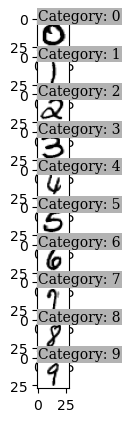

In [19]:
# set up
categories = np.unique(Y_train[:]) # all possible categories

random_selector = None
random_index = None 
number_of_answers = Y_train.shape[0] # all possibles to call to index, length of Y_train

# For loop to plot through each category
fig, axs = plt.subplots(10, 1)
for i in categories: # for each category in the categories list
    while random_selector != i: # until the result is the right category
        random_index = np.random.choice(number_of_answers,1) # generate a random index
        random_selector = Y_train[random_index][0]  # return the first item of the random index's value
    category_image = X_train[random_index].reshape(28,28) # look up the X value for the attendant index value
    axs[i].imshow(category_image, cmap=plt.cm.binary) # plot the image
    axs[i].text(0.0, 1.0, f"Category: {i}", #transform=ax.transAxes + trans,
            fontsize='medium',
            horizontalalignment = "left",
            #verticalalignment='top', 
            fontfamily='serif',#)
            bbox=dict(facecolor='0.7', edgecolor='none', pad=1.0))
    #plt.imshow(category_image, cmap=plt.cm.binary)
    #plt.colorbar()
    #print("Category:", category) # use a label instead
#plt.show
    

### S3: Sub-sampling the data
- Reduce training and testing sample sizes by **randomly selecting** %10 of the initial samples

Q3.1: What is the distribution of each label in the initial train data (i.e. percentage of each label):  

**Distribution of categories in original training set:**

category 0: 0.099

category 1: 0.112

category 2: 0.099

category 3: 0.102

category 4: 0.097

category 5: 0.09

category 6: 0.099

category 7: 0.104

category 8: 0.098

category 9: 0.099


Q3.2: What is the distribution of each label in the reduced train data:  

**Distribution of categories in sampled training set:**

category 0: 0.098

category 1: 0.114

category 2: 0.099

category 3: 0.098

category 4: 0.096

category 5: 0.092

category 6: 0.096

category 7: 0.108

category 8: 0.1

category 9: 0.1

In [20]:
# Training set
train_percent_10 = int(X_train.shape[0] * 0.1) # 10% of training set
train_original_number_samples = X_train.shape[0] # number of obs in original training set

train_sample_indices = np.random.choice(train_original_number_samples, train_percent_10, replace=False) # randomly generate a list of valid indices that is as long as 10% of the original df

X_train_sample = X_train[train_sample_indices] # call on those indices
Y_train_sample = Y_train[train_sample_indices] # call on those same indices for the Y

In [21]:
# Test set
test_percent_10 = int(X_test.shape[0] * 0.1) # 10% of test set
test_original_number_samples = X_test.shape[0] # number of obs in original test set

test_sample_indices = np.random.choice(test_original_number_samples, test_percent_10, replace=False) # randomly generate a list of valid indices that is as long as 10% of the original df

X_test_sample = X_test[test_sample_indices] # call on those indices
Y_test_sample = Y_test[test_sample_indices] # call on those same indices for the Y

In [22]:
# Distribtion of categories for the original training set

print("Distribution of categories in original training set:")
for cat, bin in zip(categories, np.bincount(Y_train)):
    print(f"category {cat}: {round(bin/Y_train.shape[0], 3)}")

Distribution of categories in original training set:
category 0: 0.099
category 1: 0.112
category 2: 0.099
category 3: 0.102
category 4: 0.097
category 5: 0.09
category 6: 0.099
category 7: 0.104
category 8: 0.098
category 9: 0.099


In [23]:
# Distribtion of categories for the random-sample 10% training set

print("Distribution of categories in sampled training set:")
for cat, bin in zip(categories, np.bincount(Y_train_sample)):
    print(f"category {cat}: {round(bin/Y_train_sample.shape[0],3)}")

Distribution of categories in sampled training set:
category 0: 0.096
category 1: 0.112
category 2: 0.09
category 3: 0.105
category 4: 0.098
category 5: 0.096
category 6: 0.097
category 7: 0.102
category 8: 0.097
category 9: 0.106


### S4: Sub-sampling the data (again)
- Reduce training and testing sample sizes by selecting **the first** %10 of the initial samples

Q4.1: What is the distribution of each label in the initial train data (i.e. percentage of each label):   

**Distribution of categories in original training set:**

category 0: 0.099

category 1: 0.112

category 2: 0.099

category 3: 0.102

category 4: 0.097

category 5: 0.09

category 6: 0.099

category 7: 0.104

category 8: 0.098

category 9: 0.099

Q4.2: What is the distribution of each label in the reduced train data:   

**Distribution of categories in first 10% training set:**

category 0: 0.099

category 1: 0.112

category 2: 0.097

category 3: 0.101

*category 4: 0.104*

category 5: 0.086

category 6: 0.101

category 7: 0.108

category 8: 0.092

category 9: 0.1

Q4.3: What are your comments/interpretation on comparison of the results for S3 and S4

**Answer:** There is little obvious difference in the distribtuion of categories between the different sampling methods in questions 3 and 4. Both provide results that are very similar to the original distribution of categories in the 60,000-variable dataset, with most varation being less than 1% difference from the original. This suggests that downsampling an original dataset may be a reasonable way to limit the size (and thus computational intensity) of a dataset without sacrificing the integrity of the data.

In [24]:
train_first_10_index = (int(X_train.shape[0] * 0.1)) # number of observations that is 10% of original
X_train_first_10 = X_train[:train_first_10_index] # slice to select the first 10%
Y_train_first_10 = Y_train[:train_first_10_index] # select the Ys

In [25]:
test_first_10_index = int(X_test.shape[0]*0.1) # number of observations that is 10% of the original
X_test_first_10 = X_test[:test_first_10_index] # slice to select the first 10%
Y_test_first_10 = Y_test[:test_first_10_index] # select the Ys

In [26]:
print("Distribution of categories in first 10% training set:")
for cat, bin in zip(categories, np.bincount(Y_train_first_10)):
    print(f"category {cat}: {round(bin/Y_train_first_10.shape[0],3)}")

Distribution of categories in first 10% training set:
category 0: 0.099
category 1: 0.112
category 2: 0.097
category 3: 0.101
category 4: 0.104
category 5: 0.086
category 6: 0.101
category 7: 0.108
category 8: 0.092
category 9: 0.1


#### ! For the rest of the HW, please discard sub-sampled data from S3 and use subsampled data from S4

### S5: Exploring the dataset
- Select all **train** images in category "3". Create and display a single pixel-wise "average image" for this category.
- Create and display a single pixel-wise "standard deviation image" for this category?
- Repeat the items above for category "3" images in the **test** set. Compare the average and standard deviation images.
- Repeat the items above for a different category you select.

Q5.1: Plot the 2D mean and std images for category 3 in training and testing sets:   **Done, see below**

Q5.2: Plot the 2D mean and std images for the category you selected in training and testing sets:   **Done, see below**

Q5.3: Comment on differences between the mean and std images from training and testing datasets? 

**Answer:** The mean images from the training and test sets are pretty clear and recognizable as numbers. The standard deviation images are much fuzzier, likely because they better capture the wider variation of those written characters. In particular, the std dev 6s don't appear to have a hole in the middle - I imagine that that creates a frequent incorrect prediction.

In [27]:
# First, rename the S4 subsample of data
X_train_new = X_train_first_10
Y_train_new = Y_train_first_10
X_test_new = X_test_first_10
Y_train_new = Y_test_first_10

#### Category 3 - Training Set

In [28]:
train_index_of_3s = list() # initialize list for indices to go to

length_train = Y_train_new.shape[0] # how long is this df - for the range

for i in range(0, length_train):
    if Y_train_new[i] == 3: # if the value is 3, append it to the list
        train_index_of_3s.append(i)

In [29]:
len(train_index_of_3s) # check if the result makes sense - it does

608

In [30]:
# select the categories 3 from the training set
Y_train_3s = Y_train_new[train_index_of_3s]
X_train_3s = X_train_new[train_index_of_3s]

In [31]:
# take average of training Xs
x_train_3s_avg = np.mean(X_train_3s, axis = 0)

Training Set Average Values for Category 3


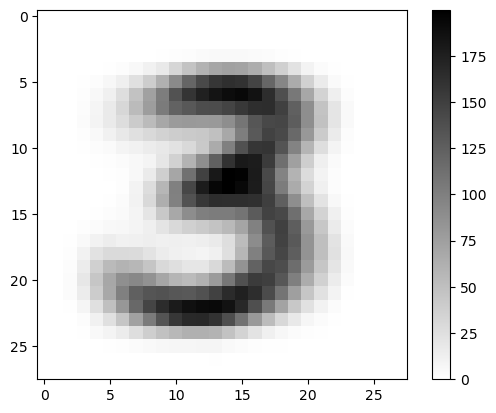

In [32]:
# Plot average of training set's category 3
plt.imshow(x_train_3s_avg, cmap=plt.cm.binary)
plt.colorbar()
print('Training Set Average Values for Category 3')

In [33]:
# take std dev of training Xs
x_train_3s_std = np.std(X_train_3s, axis = 0)

Training Set Standard Deviation Values for Category 3


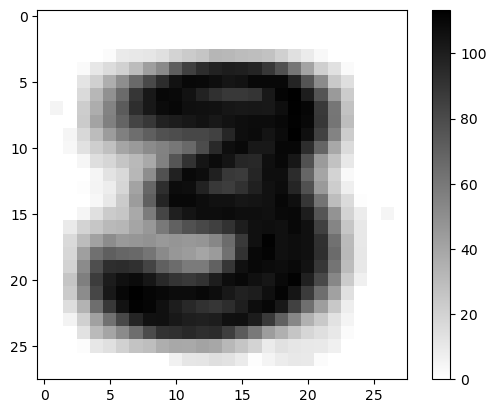

In [34]:
# Plot average of training set's category 3
plt.imshow(x_train_3s_std, cmap=plt.cm.binary)
plt.colorbar()
print('Training Set Standard Deviation Values for Category 3')

#### Category 3 - Test Set

In [35]:
# Now, same process, but for the test set:
test_index_of_3s = list() # initialize list for indices to go to

length_test = Y_train_new.shape[0] # how long is this df - for the range

for i in range(0, length_test):
    if Y_train_new[i] == 3: # if the value is 3, append it to the list
        test_index_of_3s.append(i)

In [36]:
# select the categories 3 from the test set
Y_test_3s = Y_train_new[test_index_of_3s]
X_test_3s = X_test_new[test_index_of_3s]

# take average of test Xs
x_test_3s_avg = np.mean(X_test_3s, axis = 0)

Test Set Average Values for Category 3


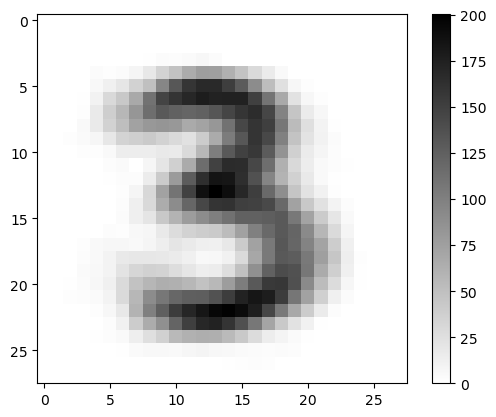

In [37]:
# Plot average of test set's category 3
plt.imshow(x_test_3s_avg, cmap=plt.cm.binary)
plt.colorbar()
print('Test Set Average Values for Category 3')

Test Set Standard Deviation Values for Category 3


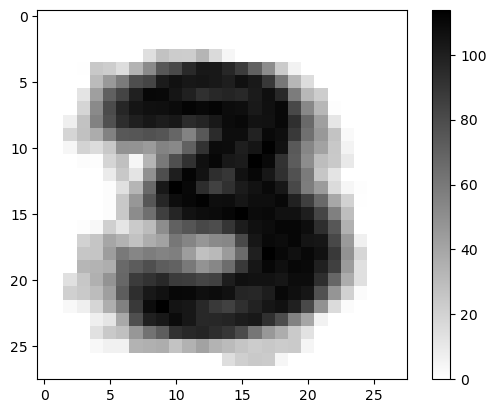

In [38]:
# take std of test Xs
x_test_3s_std = np.std(X_test_3s, axis = 0)

# Plot std of test set's category 3
plt.imshow(x_test_3s_std, cmap=plt.cm.binary)
plt.colorbar()
print('Test Set Standard Deviation Values for Category 3')

#### Category 6 - Training Set

In [41]:
# Next category: 6

train_index_of_6s = list() # initialize list for indices to go to

length_train = Y_train_new.shape[0] # how long is this df - for the range

for i in range(0, length_train):
    if Y_train_new[i] == 6: # if the value is 6, append it to the list
        train_index_of_6s.append(i)

In [42]:
# select the category 6s from the training set
Y_train_6s = Y_train_new[train_index_of_6s]
X_train_6s = X_train_new[train_index_of_6s]

Training Set Average Values for Category 6


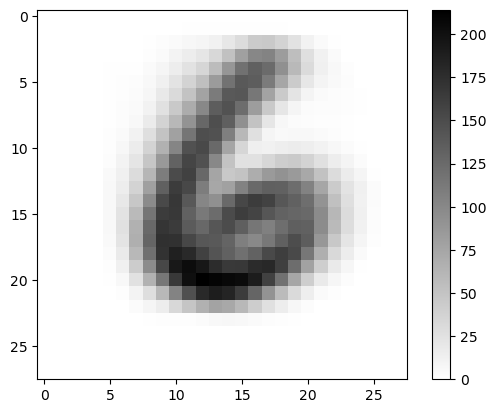

In [43]:
# take average of test Xs
x_train_6s_avg = np.mean(X_train_6s, axis = 0)

# Plot average of training set's category 6
plt.imshow(x_train_6s_avg, cmap=plt.cm.binary)
plt.colorbar()
print('Training Set Average Values for Category 6')

Training Set Standard Deviation Values for Category 6


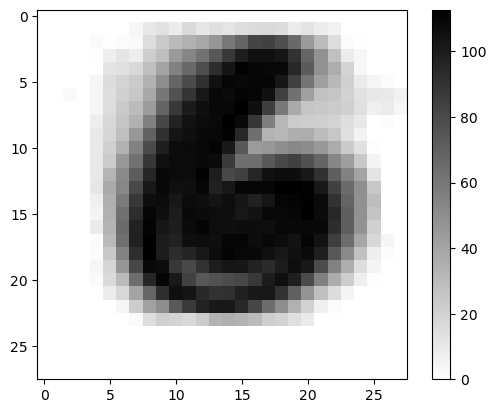

In [44]:
# take std of train Xs
x_train_6s_std = np.std(X_train_6s, axis = 0)

# Plot average of training set's category 6
plt.imshow(x_train_6s_std, cmap=plt.cm.binary)
plt.colorbar()
print('Training Set Standard Deviation Values for Category 6')

#### Category 6 - Test Set

In [45]:
# Now, same process, but for the test set:
test_index_of_6s = list() # initialize list for indices to go to

length_test = Y_train_new.shape[0] # how long is this df - for the range

for i in range(0, length_test):
    if Y_train_new[i] == 6: # if the value is 6, append it to the list
        test_index_of_6s.append(i)

Test Set Average Values for Category 6


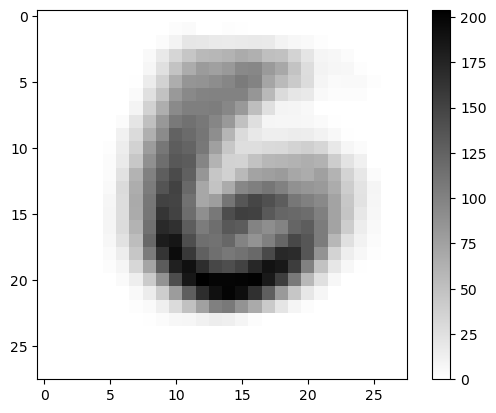

In [46]:
# select the categories 3 from the test set
Y_test_6s = Y_train_new[test_index_of_6s]
X_test_6s = X_test_new[test_index_of_6s]

# take average of test Xs
x_test_6s_avg = np.mean(X_test_6s, axis = 0)

# Plot average of test set's category 3
plt.imshow(x_test_6s_avg, cmap=plt.cm.binary)
plt.colorbar()
print('Test Set Average Values for Category 6')

Test Set Standard Deviation Values for Category 6


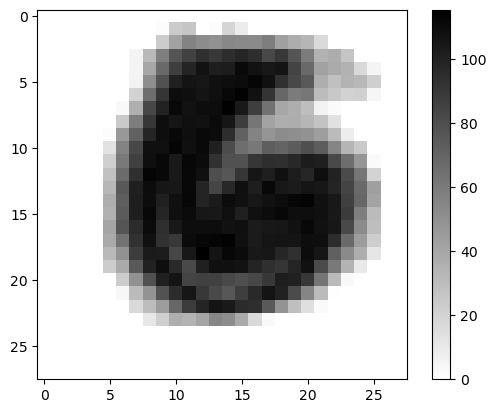

In [47]:
# take std of test Xs
x_test_6s_std = np.std(X_test_6s, axis = 0)

# Plot std of test set's category 3
plt.imshow(x_test_6s_std, cmap=plt.cm.binary)
plt.colorbar()
print('Test Set Standard Deviation Values for Category 6')

### S6: Image distances
- In the training set, find the image in category 3 that is most dissimilar to the mean image of category 3. Show it as a 2D image
- In the training set, find the image in category 3 that is most similar to mean image of category 3. Show it as a 2D image
- In the training set, find the image in category 9 that is most similar to mean image of category 3. Show it as a 2D image

**Hint:** You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | ) 

Q6.1: What is the index of most dissimilar image in category 3:   **64**

Q6.2: Plot the most dissimilar category 3 image in 2D:   **Done, below**

Q6.3: Plot the most similar category 3 image in 2D:  **Done, below**

In [48]:
dist_list = list() # initialize list for distances to go to
index_list = list() # initialize list for indices to go to

range_length_train = X_train_3s.shape[0] # how long is this df - for the range

#for i in range(60, 65):
for i in range(0, range_length_train):
    dist = np.linalg.norm(x_train_3s_avg - X_train_3s[i]) # calculate the distance between the mean image and each image
    dist_list.append(dist) # list of distances
    index_list.append(i) # list of indices

#dist_index = np.concatenate((index_list, dist_list), axis = 0)
#dist_index = list(zip(index_list, dist_list))
dist_index = np.column_stack((index_list, dist_list))

In [49]:
max_dist = dist_index.max() # Find the maximum value in all the distances.

max_index = np.argwhere(dist_index == max_dist)[0][0] # identify the index of the obs that has the max distance. Zoom into its index.
max_index # index of the most dissimilar image within category 3. Result = 64

64

Item within Category 3 that is most dissimilar to the Category's average


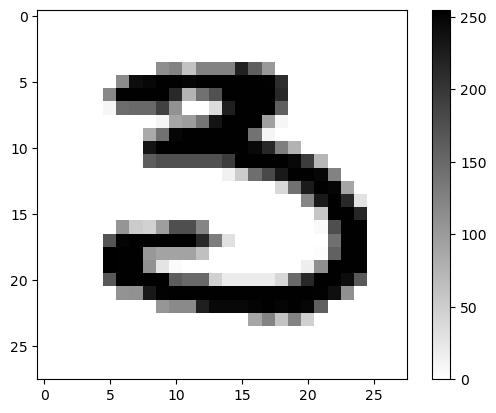

In [50]:
max_dist_item = X_train_3s[max_index] # identify the item in the training set of Category 3
max_dist_item

# Plot
plt.imshow(max_dist_item, cmap=plt.cm.binary)
plt.colorbar()
print("Item within Category 3 that is most dissimilar to the Category's average")

#### Category 3 item that is most similar to the average

In [51]:
min_dist = min(dist_index[ :,1]) # slice to just the values in the 2nd column - i.e. the distance values. Take the minimum.

min_index = np.argwhere(dist_index == min_dist)[0][0] # identify the index of the obs that has the min distance. Zoom into its index.
min_index # index of the least dissimilar image within category 3. Result = 223

223

Item within Category 3 that is least dissimilar (most similar) to the Category's average


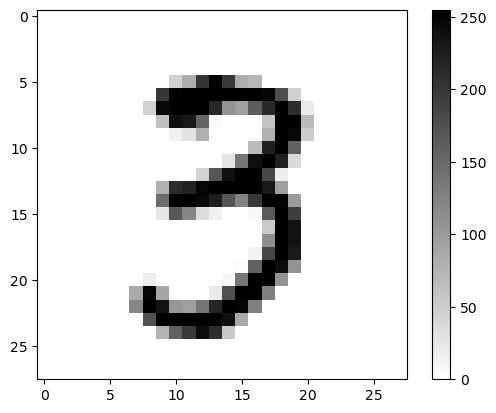

In [52]:
min_dist_item = X_train_3s[min_index] # identify the item in the training set of Category 3

# Plot
plt.imshow(min_dist_item, cmap=plt.cm.binary)
plt.colorbar()
print("Item within Category 3 that is least dissimilar (most similar) to the Category's average")

#### Category 9 item most similar to Category 3's average

In [64]:
# ID category 9

train_index_of_9s = list() # initialize list for indices to go to

length_train_9s = Y_train_new.shape[0] # how long is this df - for the range

for i in range(0, length_train_9s):
    if Y_train_new[i] == 9: # if the value is 6, append it to the list
        train_index_of_9s.append(i)

In [65]:
# select the category 9s from the training set
Y_train_9s = Y_train_new[train_index_of_9s]
X_train_9s = X_train_new[train_index_of_9s]

In [68]:
dist_9_list = list() # initialize list for distances to go to
index_9_list = list() # initialize list for indices to go to

range_length_9_train = X_train_9s.shape[0] # how long is this df - for the range

for i in range(0, range_length_9_train):
    dist = np.linalg.norm(x_train_3s_avg - X_train_9s[i]) # calculate the distance between the mean image and each image
    dist_9_list.append(dist) # list of distances
    index_9_list.append(i) # list of indices

dist_9_index = np.column_stack((index_9_list, dist_9_list)) # combine index list and distances list

Item within Category 9 that is least dissimilar (most similar) to the Category 3's average


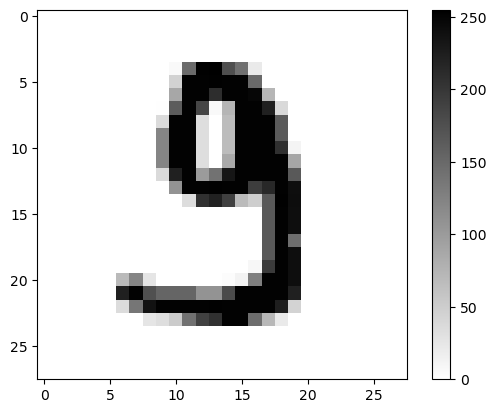

In [69]:
min_9_dist = min(dist_9_index[ :,1]) # slice to just the values in the 2nd column - i.e. the distance values. Take the minimum.

min_9_index = np.argwhere(dist_9_index == min_9_dist)[0][0] # identify the index of the obs that has the min distance. Zoom into its index.
min_9_index # index of the least dissimilar image to the average of category 3

min_dist_9_item = X_train_9s[min_9_index] # identify the item in the training set of Category 9

# Plot
plt.imshow(min_dist_9_item, cmap=plt.cm.binary)
plt.colorbar()
print("Item within Category 9 that is least dissimilar (most similar) to the Category 3's average")

### S7: Image distances, part 2
- Repeat questions S3 and S4 after binarizing the images first **I assume you mean S5 and S6. For the sake of space, I will repeat the S3 process for category 3's training set only.**

Q7.1: What is the index of most dis-similar category 3 image:   **64**

Q7.2: What is the index of most similar category 3 image:   **461**

Q7.3: Did the answer change after binarization? How do you interprete this finding?: 

**Answer:** The most dissimilar category 3 image did not change (index 64 for both binarized and non-binarized training sets). However, the most similar image was different between the binarized and non-binarized training sets (index 461 for the binarized training set, and index 223 for the non-binarized training set). I assume this is because of the (I asume normalized) distribtuon of images throughout the set - there are likely very many images that are within a small difference of the mean, while there are very few that are much further away from the mean (outliers). Therefore, when there is a transformation to the dataset (i.e. the binarization), the most similar images are more likely to change than the most dissimilar images.

#### Binarize training and test sets

In [70]:
threshold = round(255/2) # set the threshold at 50% of the maximum

binarized_X_train = (X_train_new > threshold).astype(int) # binarize X train images
binarized_X_test = (X_test_new > threshold).astype(int) # binarize X test images


#### Repeat S5 - plot average and std images
##### Category 3 train set

Binarized Training Set Average Values for Category 3


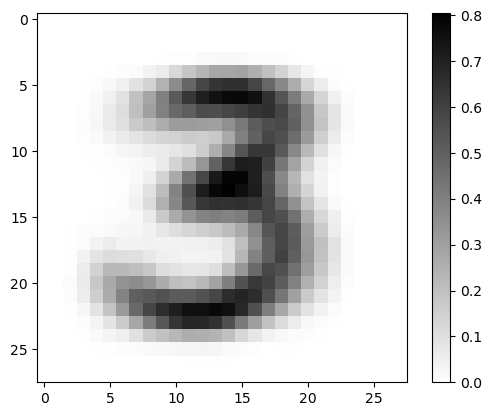

In [71]:
# select the categories 3 from the binarized training set
Y_train_3s = Y_train_new[train_index_of_3s]
X_train_bin_3s = binarized_X_train[train_index_of_3s]

# take average of binarized training Xs
x_train_bin_3s_avg = np.mean(X_train_bin_3s, axis = 0)

# Plot average of binarized training set's category 3
plt.imshow(x_train_bin_3s_avg, cmap=plt.cm.binary)
plt.colorbar()
print('Binarized Training Set Average Values for Category 3')  # Should I binarize this image? It's in grayscale because it represents the average.

Binarized Training Set Standard Deviation Values for Category 3


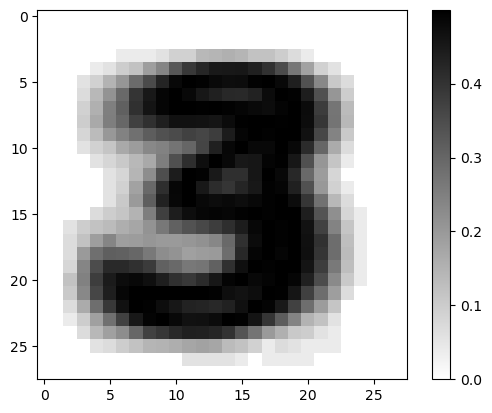

In [72]:
# take std dev of training Xs
x_train_bin_3s_std = np.std(X_train_bin_3s, axis = 0)

# Plot average of training set's category 3
plt.imshow(x_train_bin_3s_std, cmap=plt.cm.binary)
plt.colorbar()
print('Binarized Training Set Standard Deviation Values for Category 3')

#### Repeat S6

In [73]:
bin_dist_list = list() # initialize list for distances to go to (for binarized df)
bin_index_list = list() # initialize list for indices to go to (for binarized df)

range_length_bin_test = X_train_bin_3s.shape[0] # how long is this df - for the range

#for i in range(60, 65):
for i in range(0, range_length_bin_test):
    bin_dist = np.linalg.norm(x_train_bin_3s_avg - X_train_bin_3s[i]) # calculate the distance between the mean image and each image
    bin_dist_list.append(bin_dist) # list of distances
    bin_index_list.append(i) # list of indices

bin_dist_index = np.column_stack((bin_index_list, bin_dist_list))

bin_max_dist = bin_dist_index[:,1].max() # Find the maximum value in all the distances - search in just the second column.

bin_max_index = np.argwhere(bin_dist_index == bin_max_dist)[0][0] # identify the index of the obs that has the max distance. Zoom into its index.
bin_max_index # index of the most dissimilar image within binarized category 3. Result = 64

64

Item within Binarized Category 3 that is most dissimilar to the Category's average


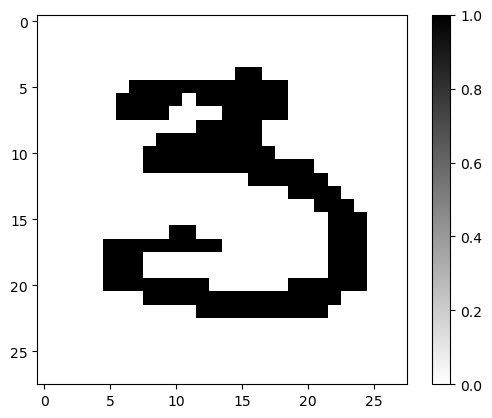

In [74]:
max_dist_bin_item = X_train_bin_3s[bin_max_index] # identify the item in the binarized training set of Category 3

# Plot
plt.imshow(max_dist_bin_item, cmap=plt.cm.binary)
plt.colorbar()
print("Item within Binarized Category 3 that is most dissimilar to the Category's average")

In [75]:
# Most similar image
min_bin_dist = min(bin_dist_index[ :,1]) # slice to just the values in the 2nd column - i.e. the distance values. Take the minimum.

bin_min_index = np.argwhere(bin_dist_index == min_bin_dist)[0][0] # identify the index of the obs that has the min distance. Zoom into its index.
bin_min_index # index of the least dissimilar image within category 3. Result = 461

461

Item within Binarized Category 3 that is least dissimilar (most similar) to the Category's average


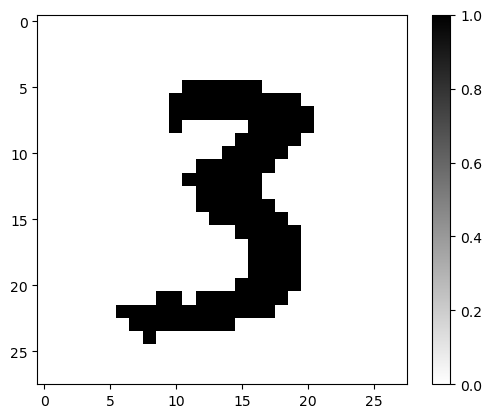

In [76]:
bin_min_dist_item = X_train_bin_3s[bin_min_index] # identify the item in the training set of Category 3

# Plot
plt.imshow(bin_min_dist_item, cmap=plt.cm.binary)
plt.colorbar()
print("Item within Binarized Category 3 that is least dissimilar (most similar) to the Category's average")

### S8: Binary classification between category 3 and 9  (split train data)
- Select images from these two categories in the training dataset
- Split them into two sets (Set1, Set2) with a %60 and %40 random split
- Replace category labels as 0 (for 3) and 1 (for 9)
- Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for Set2 
- Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for Set1 

Q8.1: What is the prediction accuracy using the model trained on Set1:   **49.3%**

Q8.2: What is the prediction accuracy using the model trained on Set2:   **50.9%**

In [77]:
# Collect images from category 3 - I already gathered them earlier
X_train_3s.shape
Y_train_3s.shape

# Collect images from category 9 - I already gathered the category 9 training set
X_train_9s.shape
Y_train_9s.shape

(601,)

In [78]:
# Combine categories 3 and 9
X_train_39 = np.concatenate([X_train_3s, X_train_9s])
Y_train_39 = np.concatenate([Y_train_3s, Y_train_9s])

In [79]:
# split into two sets
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_set1, x_set2, y_set1, y_set2 = train_test_split(X_train_39, Y_train_39, test_size=0.4)

In [80]:
# Replace category labels. cat 3 = 0, cat 9 = 1
y_set1 = (y_set1 > 3).astype(int)
y_set2 = (y_set2 > 3).astype(int)

In [81]:
# Reshape the x sets so they're 2-dimensional to work with scaling, fitting, and predicting
x_set1 = x_set1.reshape((x_set1.shape[0]),(28*28))
x_set2 = x_set2.reshape((x_set2.shape[0]),(28*28))

In [82]:
# Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for Set2 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # scale

x_set1_scaled = sc.fit_transform(x_set1) # fit

In [83]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X = x_set1_scaled, y = y_set1) # train

SVC()

In [84]:
# Predict class labels for Set2
pred_for_set2 = svm_model.predict(x_set2) # predict

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_set2, pred_for_set2) # evaluate

0.5082644628099173

In [86]:
# Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for Set1 
x_set2_scaled = sc.fit_transform(x_set2) # scale
svm_model.fit(X = x_set2_scaled, y = y_set2) # train
pred_for_set1 = svm_model.predict(x_set1) # predict
accuracy_score(y_set1, pred_for_set1) # evaluate

0.4993103448275862

### S9: Binary classification between category 3 and 9 (train + test sets)
- Select images from these two categories in the training and testing datasets
- Replace category labels as 0 (for 3) and 1 (for 9)
- Use training set to train a linear SVM classifier with default parameters and predict the class labels for the testing set
- Use testing set to train a linear SVM classifier with default parameters and predict the class labels for the training set

Q9.1: What is the prediction accuracy using the model trained on the training set:   **53.7%**

Q9.2: What is the prediction accuracy using the model trained on the testing set:   **53.2%**

In [87]:
# Collect images from category 3 - I already gathered them earlier
X_train_3s.shape
Y_train_3s.shape
X_test_3s
Y_test_3s

# Collect images from category 9 - I already gathered the category 9 training set
X_train_9s.shape
Y_train_9s.shape

(601,)

In [89]:
# I need to gather the category 9s test set
test_index_of_9s = list() # initialize list for indices to go to

length_test = Y_train_new.shape[0] # how long is this df - for the range

for i in range(0, length_test):
    if Y_train_new[i] == 9: # if the value is 6, append it to the list
        test_index_of_9s.append(i)

# select the category 9s from the training set
Y_test_9s = Y_train_new[test_index_of_9s]
X_test_9s = X_test_new[test_index_of_9s]

In [90]:
# Combine categories 3 and 9 for test and train sets
X_tt_39 = np.concatenate([X_train_3s, X_train_9s, X_test_3s, X_test_9s])
Y_tt_39 = np.concatenate([Y_train_3s, Y_train_9s, Y_test_3s, Y_test_9s])

In [91]:
# Replace category labels. cat 3 = 0, cat 9 = 1
Y_tt_39 = (Y_tt_39 > 3).astype(int)

In [92]:
# split into training and test sets 
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_39_train, x_39_test, y_39_train, y_39_test = train_test_split(X_tt_39, Y_tt_39, test_size=0.4)

# Reshape x sets
# Reshape the x sets so they're 2-dimensional to work with scaling, fitting, and predicting
x_39_train = x_39_train.reshape((x_39_train.shape[0]),(28*28))
x_39_test = x_39_test.reshape((x_39_test.shape[0]),(28*28))

In [93]:
# Use training set to train a linear SVM classifier with default parameters and predict the class labels for test set
x_39_trained_scaled = sc.fit_transform(x_39_train) # scale
svm_model.fit(X = x_39_trained_scaled, y = y_39_train) # train
pred_for_39test = svm_model.predict(x_39_test) # predict
accuracy_score(y_39_test, pred_for_39test) # evaluate

0.5372340425531915

In [94]:
# Use test set to train a linear SVM classifier with default parameters and predict the class labels for training set
x_39_test_scaled = sc.fit_transform(x_39_test) # scale
svm_model.fit(X = x_39_test_scaled, y = y_39_test) # train
pred_for_39train = svm_model.predict(x_39_train) # predict
accuracy_score(y_39_train, pred_for_39train) # evaluate

0.5319148936170213

### S10: k-NN Error Analysis
- In training and testing datasets select the images in categories: 1, 3, 5, 7 or 9
- Train k-NN classifiers using 4 to 40 nearest neighbors with a step size of 4
- Calculate and plot overall testing accuracy for each experiment

Q10.1: For k=4 what is the label that was predicted with lowest accuracy:   **Category 5**

Q10.2: For k=20 what is the label that was predicted with lowest accuracy:   **Category 5**

Q10.3: What is the label pair that was confused most often (i.e. class A is labeled as B, and vice versa):   **Category 5 was most often confused for Category 3**

Q10.4: Visualize 5 mislabeled samples with their actual and predicted labels **Done, below**

In [98]:
# Create new data set for categories 1, 3, 5, 7, 9

train_index_of_cats = list() # initialize list for indices to go to

train_length_cats = Y_train_new.shape[0] # how long is this df - for the range

cats = [1, 3, 5, 7, 9] # desired categories

for i in range(0, train_length_cats ):
    if Y_train_new[i] in cats: # if the value is in the cats list, append it to the list
        train_index_of_cats.append(i)

# select the category 9s from the training set
Y_train_cats = Y_train_new[train_index_of_cats]
X_train_cats = X_train_new[train_index_of_cats]

In [99]:
# Same thing, but for the test set:
test_index_of_cats = list() # initialize list for indices to go to

test_length_cats = Y_test_new.shape[0] # how long is this df - for the range

cats = [1, 3, 5, 7, 9] # desired categories

for i in range(0, test_length_cats ):
    if Y_test_new[i] in cats: # if the value is in the cats list, append it to the list
        test_index_of_cats.append(i)

# select the category 9s from the training set
Y_test_cats = Y_test_new[test_index_of_cats]
X_test_cats = X_test_new[test_index_of_cats]

In [118]:
# Train k-NN classifiers using 4 to 40 nearest neighbors with a step size of 4
from sklearn.neighbors import KNeighborsClassifier

sc = StandardScaler() # desfine scale

# Reshape x sets
# Reshape the x sets so they're 2-dimensional to work with scaling, fitting, and predicting
x_train_cats_reshaped = X_train_cats.reshape((X_train_cats.shape[0]),(28*28))
x_test_cats_reshaped = X_test_cats.reshape((X_test_cats.shape[0]),(28*28))

# scale
x_cats_trained_scaled = sc.fit_transform(x_train_cats_reshaped) # scale

# Initialize lists
k_step = list()
accuracy_score_list = list()
predictions_list = list()
k = 4

# train and predict using knn, for values of k 4 to 40, in steps of 4
while k <= 40:
    knn = KNeighborsClassifier(n_neighbors=k) # define
    knn.fit(X = x_cats_trained_scaled, y = Y_train_cats) # train
    pred_for_cat_test = knn.predict(x_test_cats_reshaped) # predict
    accuracy = accuracy_score(Y_test_cats, pred_for_cat_test) # evaluate
    k_step.append(k)
    accuracy_score_list.append(accuracy)
    predictions_list.append(pred_for_cat_test)
    k = k+4

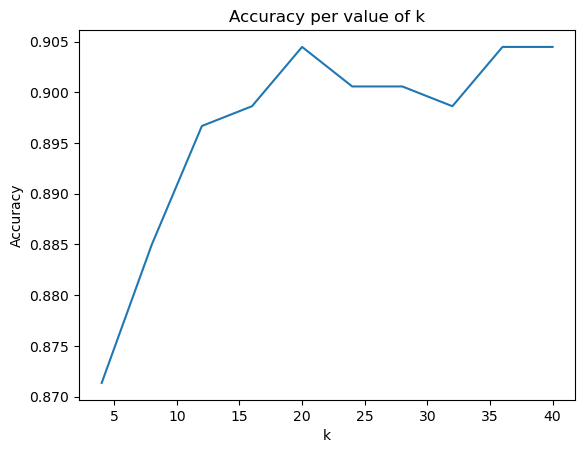

In [138]:
import seaborn as sns

cat_knn_accuracy = np.column_stack((k_step, accuracy_score_list)) # combine list of k values and their associated accuracy
cat_knn_accuracy

sns.lineplot(cat_knn_accuracy, 
            x = cat_knn_accuracy[:,0],
            y = cat_knn_accuracy[:,1])
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy per value of k")
plt.show()

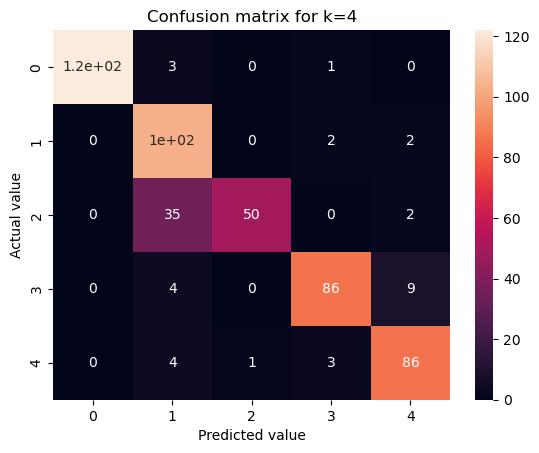

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

sns.heatmap(confusion_matrix(Y_test_cats, predictions_list[0]), annot = True) # plot confusion matrix of the first predictions, i.e. k = 4
plt.title("Confusion matrix for k=4")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

#1, 3, 5, 7, 9

# Results: y-axis are the actual values (0 = category 1, 1 = category 3, 2 = category 5, 3 = category 7, 4 = category 9 )
# x-axis are the predicted values (0 = category 1, 1 = category 3, 2 = category 5, 3 = category 7, 4 = category 9 )
# the category most commonly predicted incorrectly is category 5 (i.e. actual label 2 (category 5), predicted label 1 (category 3))

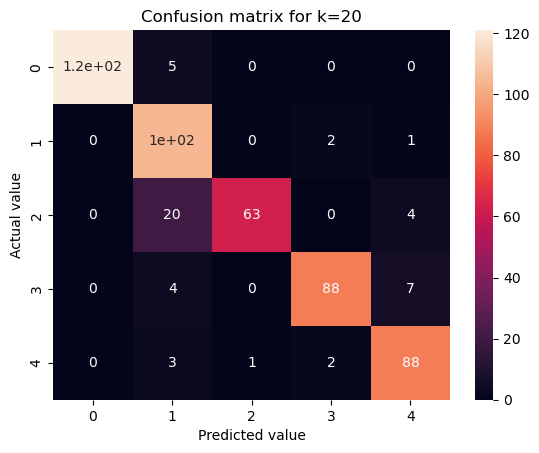

In [150]:
sns.heatmap(confusion_matrix(Y_test_cats, predictions_list[4]), annot = True) # plot confusion matrix of the 4th set of predictions, i.e. k = 20
plt.title("Confusion matrix for k=20")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

#1, 3, 5, 7, 9

# Results: y-axis are the actual values (0 = category 1, 1 = category 3, 2 = category 5, 3 = category 7, 4 = category 9 )
# x-axis are the predicted values (0 = category 1, 1 = category 3, 2 = category 5, 3 = category 7, 4 = category 9 )
# the category most commonly predicted incorrectly is category 5 (i.e. actual label 2 (category 5), predicted label 1 (category 3))

In [160]:
index_incorrect_classifications = np.argwhere(Y_test_cats != (predictions_list[0])) # index of where the predictions were incorrect
index_incorrect_classifications[1][0]

26

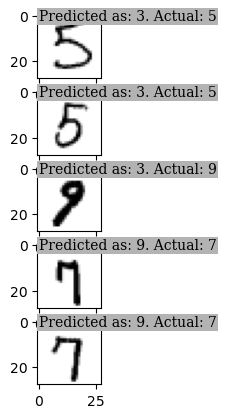

In [178]:
# For loop to plot through five incorrectly classified images
fig, axs = plt.subplots(5,1)
for i in range(0, 5): 
    index = index_incorrect_classifications[i][0]
    actual_image = X_test_cats[index]
    actual_cat = Y_test_cats[index]
    predicted_cat = predictions_list[0][index]
    axs[i].imshow(actual_image, cmap = plt.cm.binary)
    axs[i].text(0.0, 2.0, f"Predicted as: {predicted_cat}. Actual: {actual_cat}",
    fontsize='medium',
            horizontalalignment = "left",
            #verticalalignment='top', 
            fontfamily='serif',#)
            bbox=dict(facecolor='0.7', edgecolor='none', pad=1.0))

### S11: Feature extraction

- We describe each image by using a reduced set of features (compared to n=784 initial features for each pixel value) as follows:
  
  1. Binarize the image (background=0, foreground=1)

  2. For each image row i, find n_i, the sum of 1's in the row (28 features) 
  
  3. For each image column j, find n_j, the sum of 1's in the column (28 features)
  
  4. Concatenate these features into a feature vector of 56 features
  
Repeat classification experiments in S9 using this reduced feature set.

Q11.1: What is the prediction accuracy using the model trained using the train data:  **49.5%**

Q11.2: What is the prediction accuracy using the model trained using the test data:   **56%**


In [179]:
# Create dataset: split S9's data into train/test sets
x_s11_train, x_s11_test, y_s11_train, y_s11_test = train_test_split(X_tt_39, Y_tt_39, test_size=0.4)

# Binarize
threshold = round(255/2) # set the threshold at 50% of the maximum

binarized_s11_x_train = (x_s11_train > threshold).astype(int) # binarize X train images
binarized_s11_x_test = (x_s11_test > threshold).astype(int) # binarize X test images

In [274]:
reduced_x_features_train = [] # initialize list
for img in binarized_s11_x_train: # for each image in training set
    n_i = [] # inititalize list of row sums
    n_j = [0]*img.shape[1] # initialize list of column sums - a list of 28 zeroes
    for row in img: # for each row in each image
        n_i.append(np.sum(row)) # append to n_i the sum of each row
        for idx, col_value in enumerate(row): # for each column (indicated by the index) of each row
            n_j[idx] = n_j[idx] + col_value # add the column's zero to the total of the column value - essentailly, sum the column. The ongoing sum of the column for that column
    feature_vector = n_i + n_j # combine n_i and n_j to get the feature vector for each image
    reduced_x_features_train.append(feature_vector) # append each image's feature vector to our df
reduced_x_features_train = np.array(reduced_x_features_train) # convert to an np array
reduced_x_features_train.shape # confirm it's the right shape - it is

(846, 56)

In [275]:
# repeat the process for the test set
reduced_x_features_test = [] # initialize list
for img in binarized_s11_x_test: # for each image in training set
    n_i = [] # inititalize list of row sums
    n_j = [0]*img.shape[1] # initialize list of column sums - a list of 28 zeroes
    for row in img: # for each row in each image
        n_i.append(np.sum(row)) # append to n_i the sum of each row
        for idx, col_value in enumerate(row): # for each column (indicated by the index) of each row
            n_j[idx] = n_j[idx] + col_value # add the column's zero to the total of the column value - essentailly, sum the column. The ongoing sum of the column for that column
    feature_vector = n_i + n_j # combine n_i and n_j to get the feature vector for each image
    reduced_x_features_test.append(feature_vector) # append each image's feature vector to our df
reduced_x_features_test = np.array(reduced_x_features_test) # convert to an np array
reduced_x_features_test.shape # confirm it's the right shape - it is

(564, 56)

In [276]:
# Use training set to train a linear SVM classifier with default parameters and predict the class labels for test set
reduced_x_features_train_scaled = sc.fit_transform(reduced_x_features_train) # scale
svm_model.fit(X = reduced_x_features_train_scaled, y = y_s11_train) # train
pred_for_s11_test = svm_model.predict(reduced_x_features_test) # predict
accuracy_score(y_s11_test, pred_for_s11_test) # evaluate

0.4946808510638298

In [277]:
# Use test set to train a linear SVM classifier with default parameters and predict the class labels for training set
reduced_x_features_test_scaled = sc.fit_transform(reduced_x_features_test) # scale
svm_model.fit(X = reduced_x_features_test_scaled, y = y_s11_test) # train
pred_for_s11_train = svm_model.predict(reduced_x_features_train) # predict
accuracy_score(y_s11_train, pred_for_s11_train) # evaluate

0.5602836879432624

In [270]:
collection = [["a","b","c"], ["d", "e", "f"]]
sum_cols = [""]*3
for row in collection:
    for idx, value in enumerate(row):
        print("Idx:", idx, "Col:", value)
        print("before:",sum_cols[idx])
        sum_cols[idx] = sum_cols[idx] + value
        print("after:",sum_cols[idx])

sum_cols


Idx: 0 Col: a
before: 
after: a
Idx: 1 Col: b
before: 
after: b
Idx: 2 Col: c
before: 
after: c
Idx: 0 Col: d
before: a
after: ad
Idx: 1 Col: e
before: b
after: be
Idx: 2 Col: f
before: c
after: cf
3 4


### Bonus:

- This time we describe each 28 x 28 image by using a different feature set (n = 28 x 4 features). This feature set encodes "index of the first non-zero pixel in image columns or rows" from each direction (from left, right, top, bottom)

Example for a 6 x 6 image:

Img:
 0 0 0 0 0 0
 0 0 0 1 0 0
 0 0 0 1 0 0
 0 0 0 1 0 0
 0 0 0 1 0 0
 0 0 0 0 0 0
 
Extracted features:
 0 3 3 3 3 0  0 2 2 2 2 0  0 0 0 1 0 0  0 0 0 1 0 0   (left, right, top, bottom)
  
Repeat classification experiments in S9 using this reduced feature set.

Q11.1: What is the prediction accuracy using the model trained using the train data:   ___

Q11.2: What is the prediction accuracy using the model trained using the test data:   ___


In [278]:
# split s9 data into training and test sets 
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_bonus_train, x_bonus_test, y_bonus_train, y_bonus_test = train_test_split(X_tt_39, Y_tt_39, test_size=0.4)


In [281]:
x_bonus_train[1][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [287]:
example_image = np.array([[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,0,0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]],
[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,0,0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]]] )


In [295]:
example_image[0][5]

array([0, 0, 0, 0, 0, 0])

In [299]:
(example_image.shape[1])-1

5

In [300]:

reduced_features = [] # initialize list
for img in example_image: # for each image in training set
    left_index = [] # inititalize list of left indeces
    right_index = [] # initialize list of right indeces
    top_index = []
    bottom_index = []
    length_rows = (example_image.shape[1])-1
    for row in img: # for each row in each image
        for i in range(0,length_rows):
            if row[i] > 0:
                left_index.append(i)
                break
            else:
                left_index.append(0)
        for j in range(length_rows,0,-1):
            if row[j] > 0:
                right_index.append(j)
                break

            
        #n_i.append(np.sum(row)) # append to n_i the sum of each row
        #for idx, col_value in enumerate(row): # for each column (indicated by the index) of each row
            #n_j[idx] = n_j[idx] + col_value # add the column's zero to the total of the column value - essentailly, sum the column. The ongoing sum of the column for that column
    #feature_vector = n_i + n_j # combine n_i and n_j to get the feature vector for each image
    #reduced_x_features_test.append(feature_vector) # append each image's feature vector to our df
#reduced_x_features_test = np.array(reduced_x_features_test) # convert to an np array
#reduced_x_features_test.shape # confirm it's the right shape - it is

In [301]:
left_index

[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0]